# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
#Import necessary library for data collection and display
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [ ]:
# Set the URL of the paginated webpage that you want to scrape
url = "https://www.airlinequality.com/airline-reviews/british-airways"

# Initialize lists to store the data that you scrape
titles = []
dates = []
contents = []
recommendations = []
countries = []

# Initialize storage for all scraped data
data = []

# Setting the number of pages
pages = 40

# Loop through pages
for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Get page content
    page_url = f"{url}/page/{i}/?sortby=post_date%3ADesc&pagesize=100"
    page = requests.get(page_url)
    soup = BeautifulSoup(page.content, "html.parser")

    # Find all review containers on the page
    reviews = soup.find_all("div", class_="body")

    # Loop through reviews and extract data
    for review in reviews:
        # Extract data from the review container
        Title = review.find('h2', class_='text_header').text.strip()

        # Extract date directly using the time tag
        Date = review.find('time').text.strip()

        # Extract review content
        Review_content = review.find('div', class_='text_content').text.strip()

        # Extracting recommendation
        recommended_element = review.find('td', class_='recommended') or review.find('td', class_='recommended')
        Recommendation = recommended_element.find_next('td').text.strip().lower() if recommended_element else "N/A"

        # Extracting country
        Country = review.find('h3').get_text().split(')')[0].split('(')[-1].strip()

         # Append data to the list
        data.append([Title, Review_content, Recommendation, Country, Date])

    print(f"   ---> {len(data)} total reviews")


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [ ]:
# Create a DataFrame from the collected data
df = pd.DataFrame(data)
columns = ["Title", "Review_content", "Recommendation","Country", "Date"]
df = pd.DataFrame(data, columns=columns)
df.head()

,Title,Review_content,Recommendation,Country,Date
0,"""Service level far worse then Ryanair""",✅ Trip Verified | 4 Hours before takeoff we r...,no,Germany,19th November 2023
1,"""do not upgrade members based on status""",✅ Trip Verified | I recently had a delay on B...,no,United States,19th November 2023
2,"""Flight was smooth and quick""","Not Verified | Boarded on time, but it took a...",yes,Ireland,16th November 2023
3,"""Absolutely hopeless airline""","✅ Trip Verified | 5 days before the flight, w...",no,Australia,16th November 2023
4,"""Customer Service is non existent""",Not Verified | \r\nWe traveled to Lisbon for ...,no,United States,14th November 2023


In [ ]:
# Save to CSV
df.to_csv('British_A_airline_reviews.csv', index=False)

# Uncomment the below lines to download the CSV file
# from google.colab import files
# files.download('British_A_airline_reviews.csv')

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## DATA CLEANING AND TRANSFORMATION

In [ ]:
# Read csv file
reviews_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRQft2Ey4HHCzVTzd5WEaxmdhjOJqeVtA2LNhrpPb5_sknkilMVvQric0h1yil59jowtiYGbLc8CSNm/pub?gid=1608273453&single=true&output=csv"
reviews_df = pd.read_csv(reviews_url)
reviews_df.head()

,Title,Review_content,Recommendation,Country,Date
0,"""Service level far worse then Ryanair""",✅ Trip Verified | 4 Hours before takeoff we r...,no,Germany,19th November 2023
1,"""do not upgrade members based on status""",✅ Trip Verified | I recently had a delay on B...,no,United States,19th November 2023
2,"""Flight was smooth and quick""","Not Verified | Boarded on time, but it took a...",yes,Ireland,16th November 2023
3,"""Absolutely hopeless airline""","✅ Trip Verified | 5 days before the flight, w...",no,Australia,16th November 2023
4,"""Customer Service is non existent""",Not Verified | \nWe traveled to Lisbon for ou...,no,United States,14th November 2023


In [ ]:
reviews_df.tail()

,Title,Review_content,Recommendation,Country,Date
3696,British Airways customer review,This was a bmi Regional operated flight on a R...,no,United Kingdom,29th August 2012
3697,British Airways customer review,LHR to HAM. Purser addresses all club passenge...,yes,United Kingdom,28th August 2012
3698,British Airways customer review,My son who had worked for British Airways urge...,yes,United Kingdom,12th October 2011
3699,British Airways customer review,London City-New York JFK via Shannon on A318 b...,no,United States,11th October 2011
3700,British Airways customer review,SIN-LHR BA12 B747-436 First Class. Old aircraf...,no,United Kingdom,9th October 2011


In [ ]:
# Get data information
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           3701 non-null   object
 1   Review_content  3701 non-null   object
 2   Recommendation  3701 non-null   object
 3   Country         3701 non-null   object
 4   Date            3701 non-null   object
dtypes: object(5)
memory usage: 144.7+ KB


In [ ]:
# Get the data length, shape, type and columns

print(f'length of data:  {len(reviews_df)}')
print("--------------------------------")
print(f'Data Shape:  {reviews_df.shape}')
print("--------------------------------")
print(f'length of column:  {len(reviews_df.columns)}')
print("--------------------------------")
print(reviews_df.dtypes)

length of data:  3701
--------------------------------
Data Shape:  (3701, 5)
--------------------------------
length of column:  5
--------------------------------
Title             object
Review_content    object
Recommendation    object
Country           object
Date              object
dtype: object


In [ ]:
# Change the date data type from object to date.

reviews_df['Date'] = pd.to_datetime(reviews_df['Date'])
reviews_df.head()

,Title,Review_content,Recommendation,Country,Date
0,"""Service level far worse then Ryanair""",✅ Trip Verified | 4 Hours before takeoff we r...,no,Germany,2023-11-19
1,"""do not upgrade members based on status""",✅ Trip Verified | I recently had a delay on B...,no,United States,2023-11-19
2,"""Flight was smooth and quick""","Not Verified | Boarded on time, but it took a...",yes,Ireland,2023-11-16
3,"""Absolutely hopeless airline""","✅ Trip Verified | 5 days before the flight, w...",no,Australia,2023-11-16
4,"""Customer Service is non existent""",Not Verified | \nWe traveled to Lisbon for ou...,no,United States,2023-11-14


In [ ]:
reviews_df.dtypes

Title                     object
Review_content            object
Recommendation            object
Country                   object
Date              datetime64[ns]
dtype: object

In [ ]:
df.isnull().value_counts()

Title  Review_content  Recommendation  Country  Date 
False  False           False           False    False    3701
dtype: int64

In [ ]:
# Check for missing data
print("Sum of Missing Data\n")
print(reviews_df.isna().sum())

Sum of Missing Data

Title             0
Review_content    0
Recommendation    0
Country           0
Date              0
dtype: int64


In [ ]:
# Before Dublicate Removal
duplicate_count = reviews_df.duplicated(keep='first').sum()
print(duplicate_count)
print("--------------------------------\n")

duplicates = reviews_df[reviews_df.duplicated(keep=False)].iloc[:, :2]
print(duplicates)
print("--------------------------------\n")

# Drop Duplicates
reviews_df.drop_duplicates(keep='first', inplace=True)

# After Dublicate Removal
duplicate_count = reviews_df.duplicated(keep='first').sum()
print(duplicate_count)

7
--------------------------------

                                Title  \
3099  British Airways customer review   
3100  British Airways customer review   
3199  British Airways customer review   
3204  British Airways customer review   
3397  British Airways customer review   
3398  British Airways customer review   
3399  British Airways customer review   
3400  British Airways customer review   
3401  British Airways customer review   
3402  British Airways customer review   
3598  British Airways customer review   
3599  British Airways customer review   
3602  British Airways customer review   
3603  British Airways customer review   

                                         Review_content  
3099  First time in reduced leg room Club Europe. Do...  
3100  First time in reduced leg room Club Europe. Do...  
3199  We flew from Manchester to LHR to YCC and retu...  
3204  We flew from Manchester to LHR to YCC and retu...  
3397  LHR-FCO. Flew out Club Europe courtesy of a re...  


In [ ]:
reviews_df.shape

(3694, 5)

In [ ]:
# Drop the 'Title' column to focus on the content for analysis
reviews_df = reviews_df.drop(['Title'], axis=1)
reviews_df.head()

,Review_content,Recommendation,Country,Date
0,✅ Trip Verified | 4 Hours before takeoff we r...,no,Germany,2023-11-19
1,✅ Trip Verified | I recently had a delay on B...,no,United States,2023-11-19
2,"Not Verified | Boarded on time, but it took a...",yes,Ireland,2023-11-16
3,"✅ Trip Verified | 5 days before the flight, w...",no,Australia,2023-11-16
4,Not Verified | \nWe traveled to Lisbon for ou...,no,United States,2023-11-14


In [ ]:
# Remove variations of "Verified" from the Content column
# Remove everything before the | character in the Content column
reviews_df['Review_content'] = reviews_df['Review_content'].str.replace(r'^.*\|', '', regex=True).str.strip()

reviews_df.head()

,Review_content,Recommendation,Country,Date
0,4 Hours before takeoff we received a Mail stat...,no,Germany,2023-11-19
1,I recently had a delay on British Airways from...,no,United States,2023-11-19
2,"Boarded on time, but it took ages to get to th...",yes,Ireland,2023-11-16
3,"5 days before the flight, we were advised by B...",no,Australia,2023-11-16
4,"We traveled to Lisbon for our dream vacation, ...",no,United States,2023-11-14


In [ ]:
# Import necessary libraries for text processing and analysis

import nltk
import re
from textblob import TextBlob
from wordcloud import WordCloud
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

# Clean the text data
def text_processing(text):
    # Remove non-alphabetic characters
    text = re.sub('[^A-Za-z]+', ' ', str(text))

    # Text to lowercase
    text = text.lower()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Add a new column 'Processed_review' after text processing
reviews_df['Processed_review'] = reviews_df['Review_content'].apply(text_processing)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
reviews_df.head()

,Review_content,Recommendation,Country,Date,Processed_review
0,4 Hours before takeoff we received a Mail stat...,no,Germany,2023-11-19,hours takeoff received mail stating cryptic me...
1,I recently had a delay on British Airways from...,no,United States,2023-11-19,recently delay british airways bru lhr due sta...
2,"Boarded on time, but it took ages to get to th...",yes,Ireland,2023-11-16,boarded time took ages get runway due congesti...
3,"5 days before the flight, we were advised by B...",no,Australia,2023-11-16,days flight advised ba cancelled asked us rebo...
4,"We traveled to Lisbon for our dream vacation, ...",no,United States,2023-11-14,traveled lisbon dream vacation cruise portugal...


In [ ]:
# Save the cleaned dataset to a new CSV file
reviews_df.to_csv('Cleaned_BAA_reviews.csv', index=False)

# Uncomment the below lines to download the cleaned CSV file
# from google.colab import files
# files.download('Cleaned_BAA_reviews.csv')

### The dataset has been successfully cleaned. The next phase involves analysis



## EXPLORATORY DATA ANALYSIS

In [ ]:
# Import visualization libaries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Load the cleaned dataset from the provided URL
cleaned_reviews_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQkXnAKvDnyBz_Ad9NAh0JzdAFosjo-OFN9jl6x_gCzqFuJ9lvPfdFeWq_Y0edzr34_iJmrRfYPenWW/pub?gid=603942228&single=true&output=csv"
cleaned_reviews_df = pd.read_csv(cleaned_reviews_url)
cleaned_reviews_df.head()

,Review_content,Recommendation,Country,Date,Processed_review
0,4 Hours before takeoff we received a Mail stat...,no,Germany,2023-11-19,hours takeoff received mail stating cryptic me...
1,I recently had a delay on British Airways from...,no,United States,2023-11-19,recently delay british airways bru lhr due sta...
2,"Boarded on time, but it took ages to get to th...",yes,Ireland,2023-11-16,boarded time took ages get runway due congesti...
3,"5 days before the flight, we were advised by B...",no,Australia,2023-11-16,days flight advised ba cancelled asked us rebo...
4,"We traveled to Lisbon for our dream vacation, ...",no,United States,2023-11-14,traveled lisbon dream vacation cruise portugal...


In [ ]:
# Convert the 'Date' column to datetime format
cleaned_reviews_df['Date'] = pd.to_datetime(cleaned_reviews_df['Date'])

In [ ]:
# Adding a 'Review_length' column for analysis purposes
cleaned_reviews_df['Review_length'] = cleaned_reviews_df['Review_content'].apply(len)
cleaned_reviews_df.sample(5)

,Review_content,Recommendation,Country,Date,Processed_review,Review_length
1041,San Diego to Hannover via London. I booked on ...,no,Germany,2018-11-28,san diego hannover via london booked ba com lo...,1286
2257,London City to Isle of Man on BA Cityflyer ope...,yes,United Kingdom,2016-05-23,london city isle man ba cityflyer operated eas...,564
780,I had a stress free journey with my 8 yr old a...,yes,United Kingdom,2019-08-29,stress free journey yr old autistic son yr old...,993
3201,Muscat - Abu Dhabi - London. Delayed over two ...,no,United Kingdom,2015-01-11,muscat abu dhabi london delayed two hours vouc...,364
3498,Upgraded to business class on return flight fr...,no,United Kingdom,2014-08-02,upgraded business class return flight verona a...,683


In [ ]:
# Description of the non-numerical columns
cleaned_reviews_df.describe(include=object).transpose()

,count,unique,top,freq
Review_content,3694,3692,London Heathrow to Miami on one of British Air...,2
Recommendation,3694,2,no,2202
Country,3694,73,United Kingdom,2323
Processed_review,3694,3692,london heathrow miami one british airways crum...,2


In [ ]:
# Checking for Longest review length
max_r= cleaned_reviews_df['Review_length'].max()
max_r

3529

In [ ]:
# Checking for shortest review length
min_r= cleaned_reviews_df['Review_length'].min()
min_r

83

In [ ]:
# Checking for shortest review message
cleaned_reviews_df[cleaned_reviews_df['Review_length'] ==min_r]['Review_content'].iloc[0]

'No problems on this short flight. Left and arrived on time. Drink and snack served.'

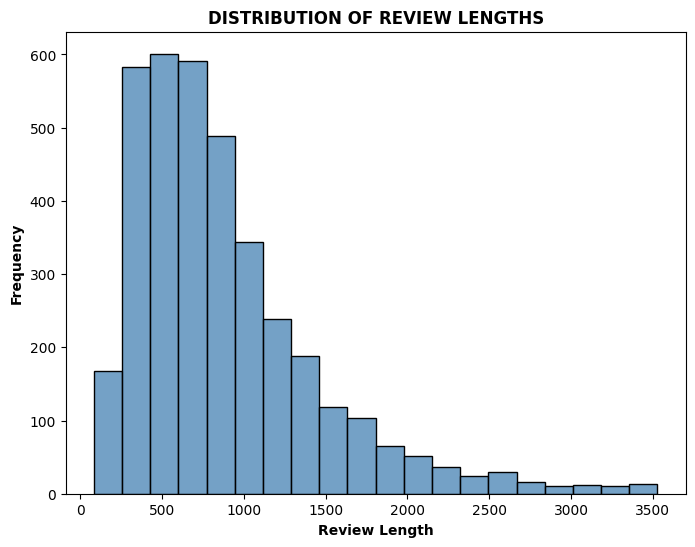

In [ ]:
# Plotting the distribution of review lengths
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_reviews_df['Review_length'], bins=20, color='steelblue')
plt.title('DISTRIBUTION OF REVIEW LENGTHS', fontweight='bold')
plt.xlabel('Review Length', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.show()

In [ ]:
# Count the distinct values for recommendation
cleaned_reviews_df['Recommendation'].value_counts()

no     2202
yes    1492
Name: Recommendation, dtype: int64

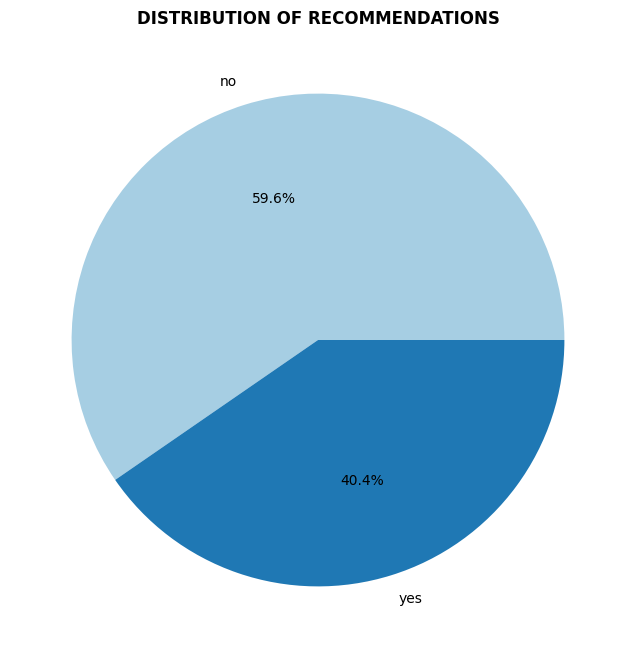

In [ ]:
# Plotting the distribution of recommendations as a pie chart
plt.figure(figsize=(8, 8))

recommendation_counts = cleaned_reviews_df['Recommendation'].value_counts()
labels = recommendation_counts.index
colors = sns.color_palette('Paired')
plt.pie(recommendation_counts,labels=labels,autopct='%1.1f%%',colors=colors)
plt.title('DISTRIBUTION OF RECOMMENDATIONS', fontweight='bold')
plt.show()

In [ ]:
# Count the distinct values for Country
cleaned_reviews_df['Country'].value_counts()

United Kingdom           2323
United States             412
Australia                 158
Canada                    114
Germany                    64
                         ... 
Vietnam                     1
Saint Kitts and Nevis       1
Chile                       1
Senegal                     1
Oman                        1
Name: Country, Length: 73, dtype: int64

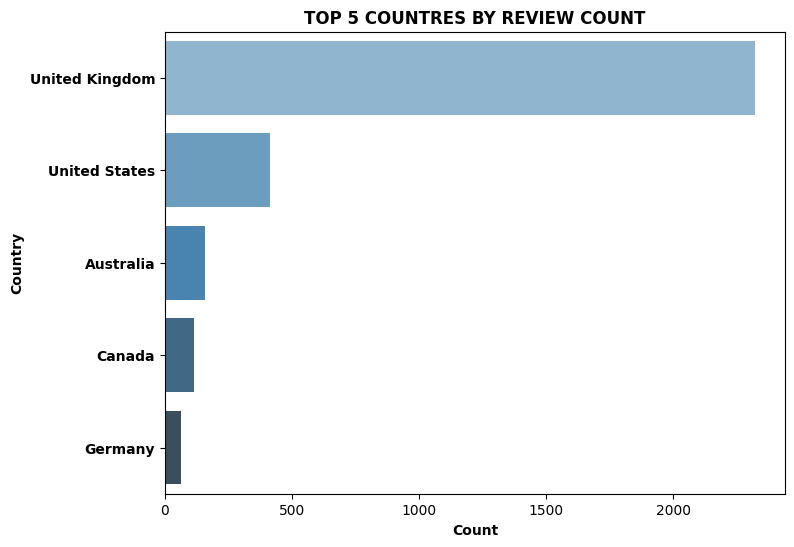

In [ ]:
# Get the top and bottom 5 countries by review count
top_countries = cleaned_reviews_df['Country'].value_counts().nlargest(5).index
bottom_countries = cleaned_reviews_df['Country'].value_counts().nsmallest(5).index

# Plot the distribution of reviews for the top 5 countries
plt.figure(figsize=(8, 6))
sns.countplot(y='Country', data=cleaned_reviews_df[cleaned_reviews_df['Country'].isin(top_countries)], order=top_countries, palette='Blues_d')
plt.title('TOP 5 COUNTRES BY REVIEW COUNT', fontweight='bold')
plt.xlabel('Count', fontweight='bold')
plt.ylabel('Country', fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

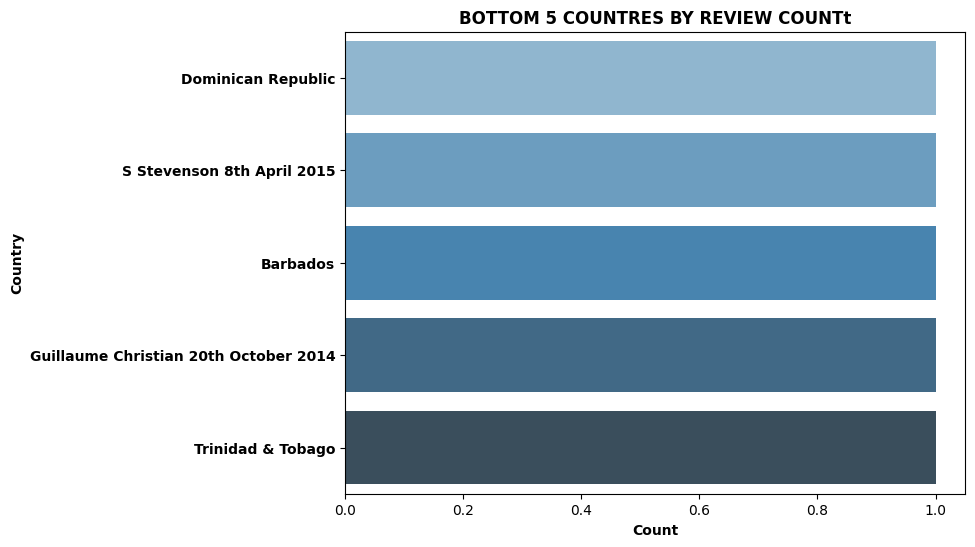

In [ ]:
# Plot the distribution of reviews for the top 5 countries
plt.figure(figsize=(8, 6))
sns.countplot(y='Country', data=cleaned_reviews_df[cleaned_reviews_df['Country'].isin(bottom_countries)], order=bottom_countries, palette='Blues_d')
plt.title('BOTTOM 5 COUNTRES BY REVIEW COUNTt', fontweight='bold')
plt.xlabel('Count', fontweight='bold')
plt.ylabel('Country', fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

In [ ]:
# Finding the earliest and latest review dates
earliest_date = cleaned_reviews_df['Date'].min()
latest_date = cleaned_reviews_df['Date'].max()

print(f"Earliest Review Date: {earliest_date}")
print(f"Latest Review Date: {latest_date}")

Earliest Review Date: 2011-10-09 00:00:00
Latest Review Date: 2023-11-19 00:00:00


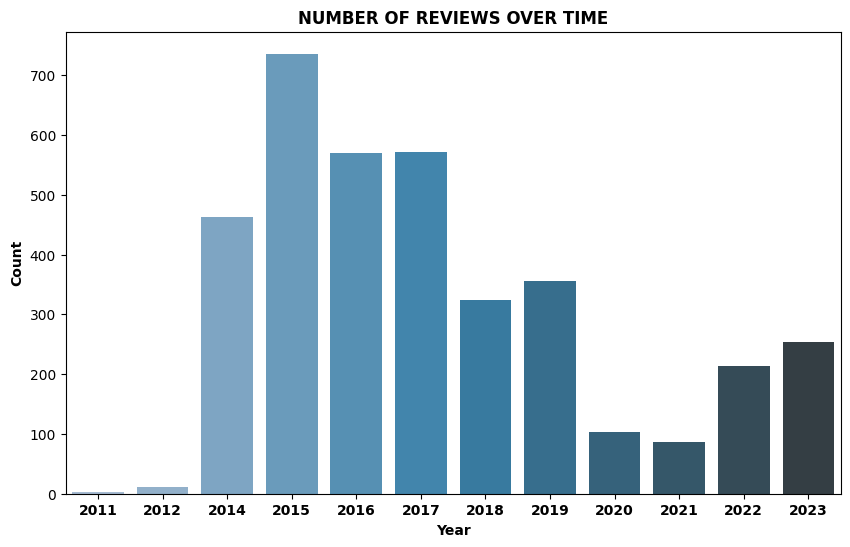

In [ ]:
# Extracting the year from the 'Date' column
cleaned_reviews_df['Year'] = cleaned_reviews_df['Date'].dt.year

# Plotting the number of reviews over time
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=cleaned_reviews_df, palette='PuBu_d')
plt.title('NUMBER OF REVIEWS OVER TIME', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

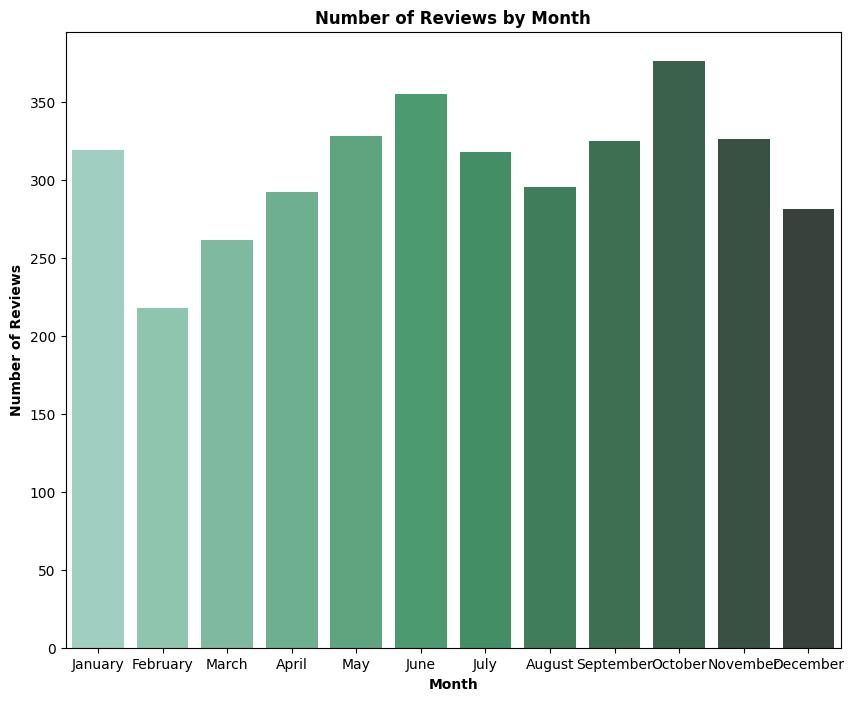

In [ ]:
# Extract Year and Month from the "Date" column
cleaned_reviews_df['Year'] = cleaned_reviews_df['Date'].dt.year
cleaned_reviews_df['Month'] = cleaned_reviews_df['Date'].dt.month_name()

# Plot the number of reviews by month
plt.figure(figsize=(10, 8))
sns.countplot(x='Month', data=cleaned_reviews_df, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette='BuGn_d')
plt.title('Number of Reviews by Month', fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Number of Reviews', fontweight='bold')
plt.show()

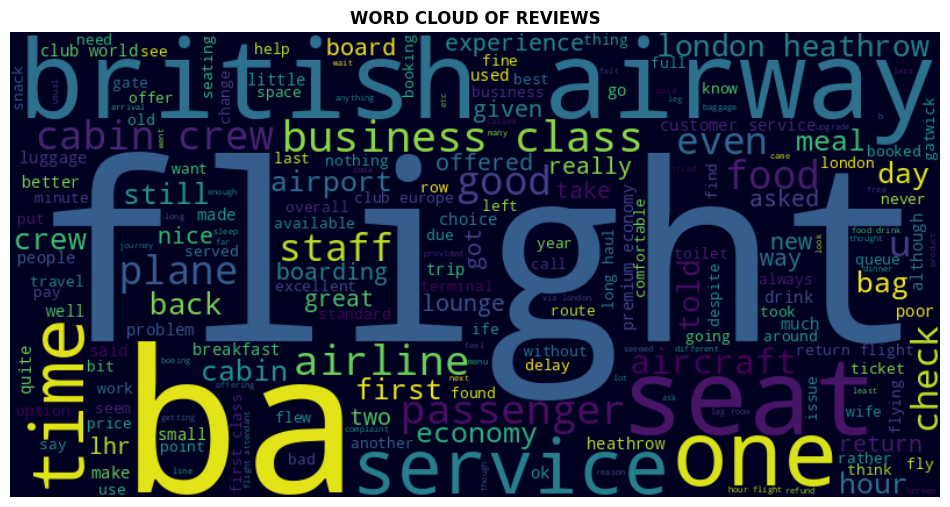

In [ ]:
# Importing WordCloud library
from wordcloud import WordCloud

# Combine all processed reviews into a single text
all_reviews_text = ' '.join(cleaned_reviews_df['Processed_review'])

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='#000020').generate(all_reviews_text)

# Plotting the WordCloud with a bold title
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WORD CLOUD OF REVIEWS', fontweight='bold')
plt.show()

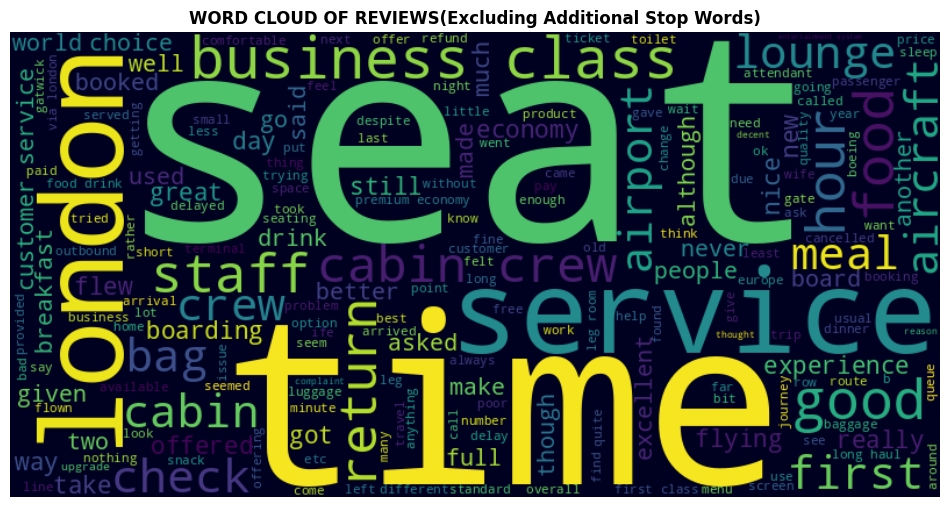

In [ ]:
# Importing necessary library
from wordcloud import WordCloud, STOPWORDS

# Additional stop words identified for exclusion in the analysis
additional_stopwords = set([
    'british', 'airways', 'club', 'lhr', 'flights', 'flight', 'airline',
    'airlines', 'passengers', 'heathrow', 'would', 'one',
    'plane', 'us', 'told', 'even', 'fly', 'back', 'ba',
])

# Combine default and additional stop words
stopwords = set(STOPWORDS) | additional_stopwords

# Generate and plot the word cloud
all_reviews_text = ' '.join(cleaned_reviews_df['Processed_review'])
wordcloud = WordCloud(width=800, height=400, background_color='#000020', stopwords=stopwords).generate(all_reviews_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WORD CLOUD OF REVIEWS(Excluding Additional Stop Words)', fontweight='bold')
plt.show()

In [ ]:
# Import countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Convert the set to a list
stopwords_list = list(STOPWORDS) + list(additional_stopwords)

# Tokenize the stop words with the same preprocessing used on your text data
vectorizer = CountVectorizer()
vectorizer.fit_transform([word.lower() for word in stopwords_list])

# Convert the list of stop words to lowercase
stopwords_list = [word.lower() for word in stopwords_list]

# Function to get the most common words from processed reviews, excluding additional stopwords
def get_most_common_words(text, num_words=100, stopwords=None):
    vectorizer = CountVectorizer(stop_words=stopwords)
    X = vectorizer.fit_transform(text)
    word_counts = X.sum(axis=0).A1
    word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))
    most_common_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:num_words]
    return most_common_words

# Get the most common words from the 'Processed_review' column
most_common_words = get_most_common_words(cleaned_reviews_df['Processed_review'], stopwords=stopwords_list)

# Print the most common words
most_common_words

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


[('service', 2832),
 ('seat', 2379),
 ('food', 2350),
 ('london', 2220),
 ('crew', 2141),
 ('seats', 2099),
 ('time', 2077),
 ('good', 2061),
 ('cabin', 1969),
 ('class', 1894),
 ('business', 1582),
 ('staff', 1578),
 ('economy', 1425),
 ('first', 1289),
 ('check', 1284),
 ('return', 1112),
 ('hours', 1070),
 ('lounge', 1011),
 ('boarding', 1010),
 ('experience', 906),
 ('new', 905),
 ('aircraft', 863),
 ('meal', 844),
 ('hour', 818),
 ('long', 742),
 ('really', 717),
 ('drinks', 715),
 ('well', 707),
 ('better', 700),
 ('customer', 700),
 ('airport', 684),
 ('premium', 678),
 ('minutes', 677),
 ('comfortable', 676),
 ('got', 667),
 ('much', 661),
 ('great', 650),
 ('world', 647),
 ('flew', 638),
 ('poor', 635),
 ('served', 634),
 ('two', 632),
 ('flying', 622),
 ('old', 619),
 ('offered', 615),
 ('entertainment', 610),
 ('friendly', 609),
 ('way', 609),
 ('nice', 597),
 ('full', 594),
 ('made', 590),
 ('luggage', 585),
 ('due', 578),
 ('excellent', 571),
 ('still', 568),
 ('last', 558

In [ ]:
# Sentiment analysis function using TextBlob
def get_sentence_sentiment(sentence):
    return TextBlob(sentence).sentiment.polarity

# Dictionary to store average sentiment for each keyword
keyword_sentiments = {}

# Iterate over most common words
for keyword, _ in most_common_words:
    # Filter reviews containing the keyword
    keyword_reviews = cleaned_reviews_df[cleaned_reviews_df['Processed_review'].str.contains(keyword, case=False, na=False)]

    # Calculate and store average sentiment for the keyword
    sentence_sentiments = [get_sentence_sentiment(sentence) for sentence in keyword_reviews['Processed_review']]
    average_sentiment = sum(sentence_sentiments) / len(sentence_sentiments) if len(sentence_sentiments) > 0 else 0
    keyword_sentiments[keyword] = average_sentiment

# Print average sentiment for each keyword
for keyword, sentiment in keyword_sentiments.items():
    print(f"{keyword}: {sentiment:.2f}")

service: 0.10
seat: 0.10
food: 0.12
london: 0.09
crew: 0.15
seats: 0.10
time: 0.11
good: 0.19
cabin: 0.12
class: 0.09
business: 0.08
staff: 0.09
economy: 0.10
first: 0.12
check: 0.10
return: 0.10
hours: 0.05
lounge: 0.15
boarding: 0.12
experience: 0.09
new: 0.12
aircraft: 0.11
meal: 0.11
hour: 0.06
long: 0.09
really: 0.12
drinks: 0.14
well: 0.15
better: 0.13
customer: 0.02
airport: 0.08
premium: 0.08
minutes: 0.08
comfortable: 0.15
got: 0.08
much: 0.12
great: 0.21
world: 0.14
flew: 0.11
poor: 0.02
served: 0.11
two: 0.07
flying: 0.08
old: 0.06
offered: 0.09
entertainment: 0.11
friendly: 0.19
way: 0.08
nice: 0.20
full: 0.14
made: 0.10
luggage: 0.07
due: 0.06
excellent: 0.26
still: 0.09
last: 0.06
breakfast: 0.12
take: 0.08
arrived: 0.10
another: 0.05
board: 0.12
next: 0.06
late: 0.06
never: 0.02
choice: 0.11
gatwick: 0.09
booked: 0.06
bag: 0.09
asked: 0.05
delayed: 0.04
small: 0.08
people: 0.06
given: 0.07
leg: 0.11
trip: 0.10
drink: 0.13
day: 0.08
took: 0.08
via: 0.09
left: 0.07
ok: 0.0

In [ ]:
# Apply additional stop words to the 'Processed_review' column
cleaned_reviews_df['Processed_review'] = cleaned_reviews_df['Processed_review'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in additional_stopwords]))
cleaned_reviews_df.head()

,Review_content,Recommendation,Country,Date,Processed_review,Review_length,Year,Month
0,4 Hours before takeoff we received a Mail stat...,no,Germany,2023-11-19,hours takeoff received mail stating cryptic me...,684,2023,November
1,I recently had a delay on British Airways from...,no,United States,2023-11-19,recently delay bru due staff shortages announc...,1155,2023,November
2,"Boarded on time, but it took ages to get to th...",yes,Ireland,2023-11-16,boarded time took ages get runway due congesti...,287,2023,November
3,"5 days before the flight, we were advised by B...",no,Australia,2023-11-16,days advised cancelled asked rebook hour hour ...,1304,2023,November
4,"We traveled to Lisbon for our dream vacation, ...",no,United States,2023-11-14,traveled lisbon dream vacation cruise portugal...,886,2023,November


#### Note: This session focuses on analyzing the sentiments of each overall review using the vaderSentiment analysis.


In [ ]:
# Install the vaderSentiment library
!pip install vaderSentiment

In [ ]:
# Import necessary libraries for sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Function to get sentiment using both TextBlob and vaderSentiment
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_vader = SentimentIntensityAnalyzer().polarity_scores(text)

    if sentiment_vader['compound'] > 0:
        return ('Positive', sentiment_vader['compound'])
    elif sentiment_vader['compound'] < 0:
        return ('Negative', sentiment_vader['compound'])
    else:
        return ('Neutral', sentiment_vader['compound'])

# Apply sentiment analysis and create new columns
cleaned_reviews_df[['sentiment', 'compound']] = cleaned_reviews_df['Processed_review'].apply(get_sentiment).apply(pd.Series)

In [ ]:
cleaned_reviews_df.head()

,Review_content,Recommendation,Country,Date,Processed_review,Review_length,Year,Month,sentiment,compound
0,4 Hours before takeoff we received a Mail stat...,no,Germany,2023-11-19,hours takeoff received mail stating cryptic me...,684,2023,November,Negative,-0.8580
1,I recently had a delay on British Airways from...,no,United States,2023-11-19,recently delay bru due staff shortages announc...,1155,2023,November,Negative,-0.6096
2,"Boarded on time, but it took ages to get to th...",yes,Ireland,2023-11-16,boarded time took ages get runway due congesti...,287,2023,November,Positive,0.4404
3,"5 days before the flight, we were advised by B...",no,Australia,2023-11-16,days advised cancelled asked rebook hour hour ...,1304,2023,November,Negative,-0.2247
4,"We traveled to Lisbon for our dream vacation, ...",no,United States,2023-11-14,traveled lisbon dream vacation cruise portugal...,886,2023,November,Positive,0.7964


In [ ]:
# Value counts for the 'sentiment' column
cleaned_reviews_df['sentiment'].value_counts()

Positive    2461
Negative    1214
Neutral       19
Name: sentiment, dtype: int64

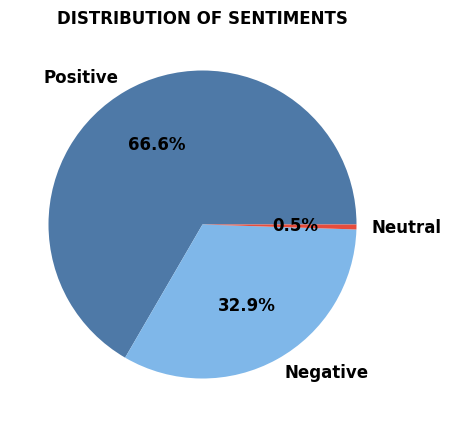

In [ ]:
# Plotting the distribution of sentiments as a pie chart
plt.figure(figsize=(6, 5))
sentiment_counts = cleaned_reviews_df['sentiment'].value_counts()
labels = sentiment_counts.index
colors = sns.color_palette(['#4e79a7', '#7fb7e9', '#e74c3c'])
plt.pie(sentiment_counts,labels=labels,autopct='%1.1f%%',colors=colors,textprops={'fontweight': 'bold', 'fontsize': 12})
plt.title('DISTRIBUTION OF SENTIMENTS', fontweight='bold')
plt.show()

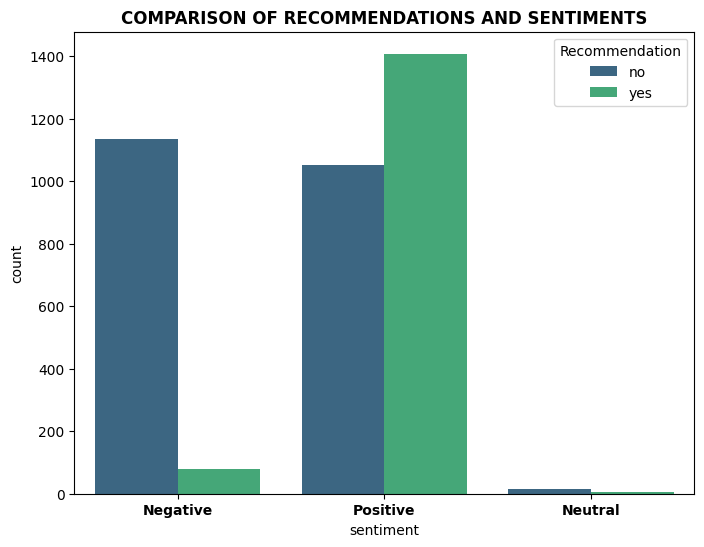

In [ ]:
# Compare sentiments and recommendations
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', hue='Recommendation', data=cleaned_reviews_df, palette='viridis')
plt.title('COMPARISON OF RECOMMENDATIONS AND SENTIMENTS',fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

In [ ]:
# Check the negatively classified reviews
negative_list = cleaned_reviews_df[cleaned_reviews_df['sentiment']=='Negative']['Review_content'][0:2].tolist()
negative_list

['4 Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time. So did the capacity of the Heathrow Airport really hit British Airways by surprise, 4h before departure? Anyhow - we took the one hour delay so what - but then we have been forced to check in our Hand luggage. I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage. Overall 2h later at home than planed, with really no reason, just due to incompetent people. Service level far worse then Ryanair and triple the price. Really never again. Thanks for nothing.',
 'I recently had a delay on British Airways from BRU to LHR that was due to staff shortages. They announced that there was a 2 hour holding delay but they would board us immediately in hopes of clearing the gate and leaving early. We had to wait the full 2 hours inside the airplane. The plane was old, dirty, h

In [ ]:
# Check the positively classified reviews
positive_list = cleaned_reviews_df[cleaned_reviews_df['sentiment']=='Positive']['Review_content'][0:2].tolist()
positive_list

['Boarded on time, but it took ages to get to the runway due to congestion. Flight was smooth and quick. Snack and drinks were good for a short flight. Landed only about ten minutes late. One bag of three left in London, forms quickly filled in, and the bag was delivered the next morning.',
 'We traveled to Lisbon for our dream vacation, a cruise to Portugal and Spain. Our friends did not EVER get their luggage. It was a two week cruise. Two weeks without a change of clothes or her CPAP machine. Contacting customer service was a nightmare. We never talked to a real person. Very little effort was put into getting them their bags. In one port we were on the ship and the bags were at the airport. The airlines did not deliver the bags nor did they tell our friends that they needed to go get them. The airline couldn’t be bothered to take the bags from the airport to the ship. BA says it is their policy to get you your bags within 72 hours. That is a joke! It’s been over two weeks and they s

In [ ]:
# Check for negative sentiments but recommended
negative_and_recommended = cleaned_reviews_df[(cleaned_reviews_df['sentiment'] == 'Negative') & (cleaned_reviews_df['Recommendation'] == 'yes')]['Review_content'].head(2).tolist()
negative_and_recommended

["Booked online months ago and the only hitch was replacement aircraft meaning chosen seats were different. I was informed of this prior to departure so could amend. Bag drop at MAN T3 wasn't smooth but I suspect that was MAN fault. Shuttle boarding was slow and delayed meaning a rush at LHR T5. The flight to CPT was full but we left more or less on time. The cabin was clean and PE was what we expected, sufficient leg and arm room plus a few little perks with drinks. Only complaint is the seats actually recline too far. Staff were very good during the first few hours of service, especially George. Food was quite tasty but one option wasn't loaded. Breakfast was also quite tasty and we landed on time. The fly in the ointment is both our cases arrived late on the carousel and only later did we notice both had been broken into, likely at CPT. All in all a pleasant surprise.",
 'Angry, disappointed, and unsatisfied. My route was from London to Atlanta. My suitcase was not boarded, therefor

In [ ]:
# Check for positive sentiments but not recommended
positive_not_recommended = cleaned_reviews_df[(cleaned_reviews_df['sentiment'] == 'Positive') & (cleaned_reviews_df['Recommendation'] == 'no')]['Review_content'].head(2).tolist()
positive_not_recommended

['We traveled to Lisbon for our dream vacation, a cruise to Portugal and Spain. Our friends did not EVER get their luggage. It was a two week cruise. Two weeks without a change of clothes or her CPAP machine. Contacting customer service was a nightmare. We never talked to a real person. Very little effort was put into getting them their bags. In one port we were on the ship and the bags were at the airport. The airlines did not deliver the bags nor did they tell our friends that they needed to go get them. The airline couldn’t be bothered to take the bags from the airport to the ship. BA says it is their policy to get you your bags within 72 hours. That is a joke! It’s been over two weeks and they still don’t have them. They are back home in the US and last they heard the bags were in Lisbon! If your have a choice, do not fly British Airways. Customer Service is non existent!',
 'As an infrequent flyer, British Airways was always my first choice. With some reassurance and comfort of se

####Conclusion
Upon a comprehensive exploration of both positive and negative feedback, a more detailed perspective emerges. Overall, more customers than not express satisfaction with the airline, emphasizing specific positive aspects of their flight experiences. However, they also point out areas that could be improved.

What's particularly intriguing is that a few negatively classified reviews still recommended the airline. This complexity suggests that, despite overall dissatisfaction, customers find certain elements noteworthy enough to endorse the airline. This scenario underscores the importance of pinpointing these specific positive aspects, as they appear to play a crucial role in shaping overall recommendations. Additionally, paying attention to the highlighted areas for improvement in negative feedback is essential. Addressing these concerns can contribute significantly to creating a more positive and satisfactory experience for passengers.

It's noteworthy that a substantial number of positive reviews don't result in recommendations. This indicates that, despite positive sentiments, there are aspects or experiences that, when not aligned with expectations, deter customers from recommending the airline. Identifying and addressing these specific concerns is vital to creating an overall positive and recommendable customer experience.
